In [132]:
import pandas as pd
import numpy as np
from IPython.display import Image
from IPython.display import HTML
import seaborn as sns

In [133]:
bookdf = pd.read_csv("books.csv")
bookdf.head()

C:\Users\Raj\AppData\Local\Temp\ipykernel_13504\3379994655.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  bookdf = pd.read_csv("books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [134]:
usersdf = pd.read_csv("users.csv")
usersdf.head()


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [135]:
ratingdf = pd.read_csv("ratings.csv")
ratingdf.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [136]:
userrating_df = pd.merge(usersdf, ratingdf, on='User-ID')
userrating_df.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0


In [137]:
# ratingdf = ratingdf[ratingdf['Book-Rating'] != 0]

ratingdf['mean_rating'] = ratingdf.groupby('ISBN')['Book-Rating'].transform('mean')
ratingdf['rating_count'] = ratingdf.groupby('ISBN')['Book-Rating'].transform('count')


ratingdf['top_rating'] = ratingdf['rating_count'] /ratingdf['mean_rating'] 
ratingdf.head()
ratingdf.groupby('ISBN')


In [138]:
bookrating_df = pd.merge(bookdf, ratingdf, on='ISBN').drop_duplicates(subset='ISBN')
bookrating_df = bookrating_df[bookrating_df['mean_rating'] != 0]
bookrating_df.head()
# bookrating_df.describe()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,mean_rating,rating_count,top_rating
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,4.928571,14,2.840580
15,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,5.000000,3,0.600000
18,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,4.272727,11,2.574468
30,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,8,0,4.212121,33,7.834532
63,0425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,8,0,1.600000,5,3.125000


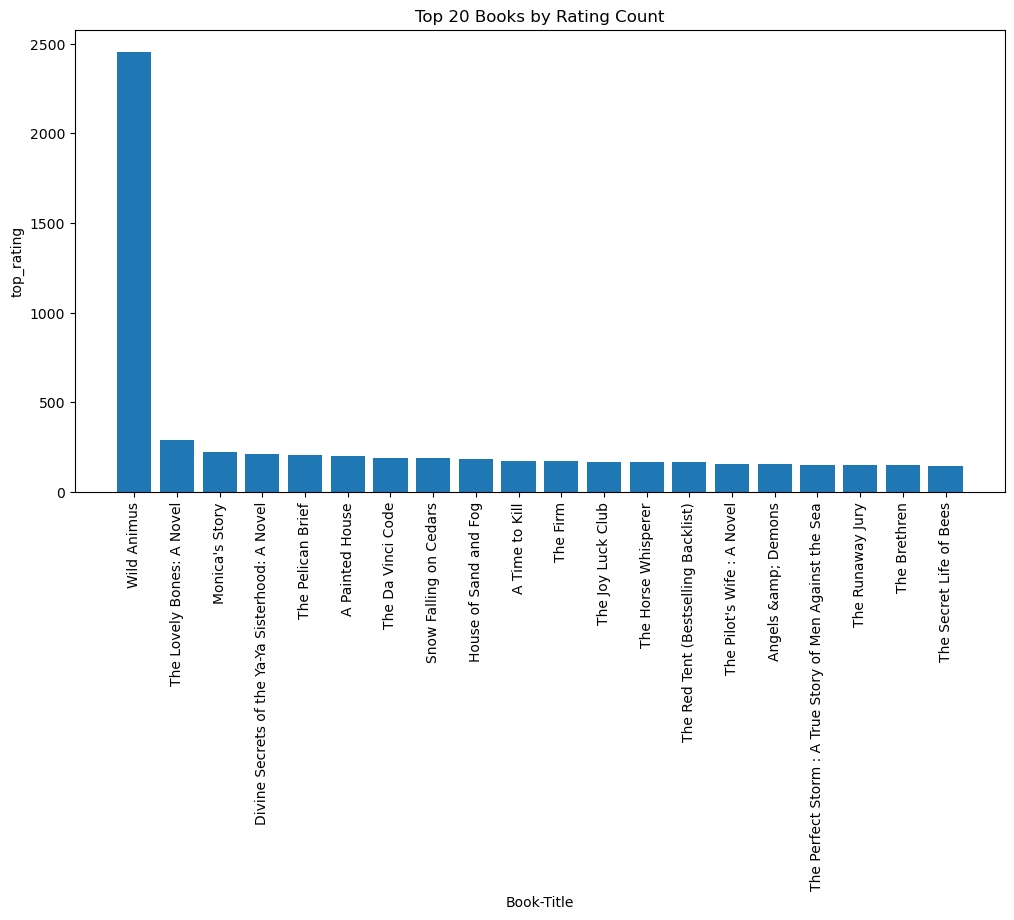

In [139]:
# top_books = bookrating_df.sort_values(by=['mean_rating', 'rating_count'], ascending=[False, False]).head(50)

top_books = bookrating_df.sort_values(by=['top_rating'], ascending=[False]).head(20)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_books['Book-Title'], top_books['top_rating'])
plt.xticks(rotation=90)
plt.xlabel('Book-Title')
plt.ylabel('top_rating')
plt.title('Top 20 Books by Rating Count')
plt.show()


In [140]:
HTML(top_books[['Book-Title' , 'Book-Author' ,  'mean_rating', 'rating_count' , 'top_rating' , 'Image-URL-M']].to_html(formatters={'Image-URL-M': lambda url: f'<img src="{url}" width="100">'}, escape=False))


,Book-Title,Book-Author,mean_rating,rating_count,top_rating,Image-URL-M
769,Wild Animus,Rich Shapero,1.019584,2502,2453.941200,
24184,The Lovely Bones: A Novel,Alice Sebold,4.468726,1295,289.791775,
564064,Monica's Story,Andrew Morton,0.095238,21,220.500000,
54819,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,3.448087,732,212.291601,
105054,The Pelican Brief,John Grisham,2.523901,523,207.218939,
19832,A Painted House,John Grisham,3.187017,647,203.011154,
41270,The Da Vinci Code,Dan Brown,4.652322,883,189.797712,
87725,Snow Falling on Cedars,David Guterson,3.255700,614,188.592296,
157857,House of Sand and Fog,Andre Dubus III,3.039855,552,181.587604,
48187,A Time to Kill,JOHN GRISHAM,2.976789,517,173.677063,


In [141]:
all_books = bookrating_df.sort_values(by=['top_rating'], ascending=[False])
all_books.describe()

,User-ID,Book-Rating,mean_rating,rating_count,top_rating
count,149836.000000,149836.000000,149836.000000,149836.000000,149836.000000
mean,95585.281868,5.329821,5.200425,5.682953,2.229684
std,82148.365757,3.801602,2.721415,18.309680,8.992646
min,8.000000,0.000000,0.095238,1.000000,0.100000
25%,25011.500000,0.000000,3.000000,1.000000,0.142857
50%,72959.500000,7.000000,5.000000,2.000000,0.500000
75%,153662.000000,8.000000,8.000000,5.000000,1.750000
max,278854.000000,10.000000,10.000000,2502.000000,2453.941200


In [142]:
# Group the DataFrame by 'User-ID' and calculate the mean age for each user
user_mean_ages = userrating_df.groupby('User-ID')['Age'].mean()

# Merge the original DataFrame with the mean ages
df_merged = userrating_df.merge(user_mean_ages.rename('Mean_Age'), on='User-ID')

# Fill NaN values in the 'Age' column with the respective user's mean age
df_merged['Age'] = df_merged['Age'].fillna(df_merged['Mean_Age'])

# Drop the 'Mean_Age' column as it's no longer needed
userrating_df = df_merged.drop(columns=['Mean_Age'])

userrating_df = userrating_df[(userrating_df['Age'] > 0) & (userrating_df['Age'] <= 100)]

userrating_df

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
23,10,"albacete, wisconsin, spain",26.0,1841721522,0
24,10,"albacete, wisconsin, spain",26.0,8477024456,6
39,19,"weston, ,",14.0,0375759778,7
40,20,"langhorne, pennsylvania, usa",19.0,0425163091,0
...,...,...,...,...,...
1149767,278851,"dallas, texas, usa",33.0,1558531025,8
1149768,278851,"dallas, texas, usa",33.0,1566910102,0
1149769,278851,"dallas, texas, usa",33.0,1569661057,10
1149770,278851,"dallas, texas, usa",33.0,1885071213,7


C:\Users\Raj\AppData\Local\Temp\ipykernel_13504\3487063204.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(userrating_df['Age'])
d:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

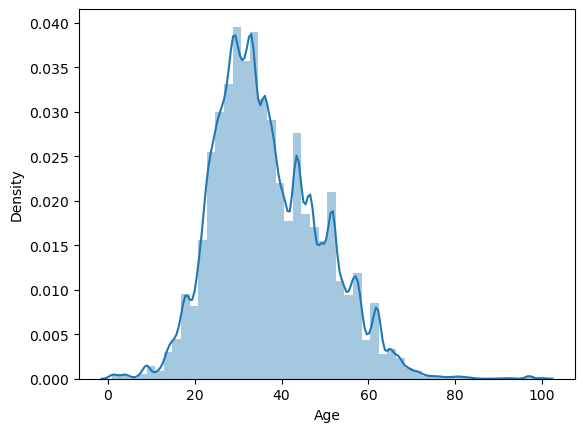

In [143]:

sns.distplot(userrating_df['Age'])

# plt.figure(figsize=(10, 6))
# plt.scatter(userrating_df['Age'], userrating_df['Book-Rating'], alpha=0.5)
# plt.xlabel('Age')
# plt.ylabel('Rating')
# plt.title('User Ratings by Age')
# plt.show()


In [144]:

userrating_df = userrating_df.merge(all_books, on=['User-ID' , 'ISBN' , 'Book-Rating'])
# userrating_df = userrating_df.merge(bookdf, on='ISBN')


userrating_df
# top_books

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,mean_rating,rating_count,top_rating
0,10,"albacete, wisconsin, spain",26.0,1841721522,0,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters &amp; Small Ltd,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...,2.000000,37,18.500000
1,19,"weston, ,",14.0,0375759778,7,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...,3.407407,27,7.923913
2,20,"langhorne, pennsylvania, usa",19.0,0425163091,0,Chocolate Jesus,Stephan Jaramillo,1998,Berkley Publishing Group,http://images.amazon.com/images/P/0425163091.0...,http://images.amazon.com/images/P/0425163091.0...,http://images.amazon.com/images/P/0425163091.0...,2.555556,9,3.521739
3,36,"montreal, quebec, canada",24.0,067176537X,0,The Therapeutic Touch: How to Use Your Hands t...,Dolores Krieger,1979,Fireside,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...,4.000000,4,1.000000
4,42,"appleton, wisconsin, usa",17.0,0553582747,7,From the Corner of His Eye,Dean Koontz,2001,Bantam Books,http://images.amazon.com/images/P/0553582747.0...,http://images.amazon.com/images/P/0553582747.0...,http://images.amazon.com/images/P/0553582747.0...,3.490909,165,47.265625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105062,278851,"dallas, texas, usa",33.0,1558531025,8,Life's Little Instruction Book (Life's Little ...,H. Jackson Brown,1991,Thomas Nelson,http://images.amazon.com/images/P/1558531025.0...,http://images.amazon.com/images/P/1558531025.0...,http://images.amazon.com/images/P/1558531025.0...,3.651685,89,24.372308
105063,278851,"dallas, texas, usa",33.0,1566910102,0,Oregon Handbook (The Americas Series),Stuart Warren,1995,Pub Group West,http://images.amazon.com/images/P/1566910102.0...,http://images.amazon.com/images/P/1566910102.0...,http://images.amazon.com/images/P/1566910102.0...,6.333333,3,0.473684
105064,278851,"dallas, texas, usa",33.0,1569661057,10,"Dallas Street Map Guide and Directory, 2000 Ed...",Mapsco,1999,American Map Corporation,http://images.amazon.com/images/P/1569661057.0...,http://images.amazon.com/images/P/1569661057.0...,http://images.amazon.com/images/P/1569661057.0...,10.000000,1,0.100000
105065,278851,"dallas, texas, usa",33.0,1885071213,7,"Highpoint Adventures, A Pocket Guide to the 50...",Charlie Winger,1999,Sequoia Publishing,http://images.amazon.com/images/P/1885071213.0...,http://images.amazon.com/images/P/1885071213.0...,http://images.amazon.com/images/P/1885071213.0...,8.000000,2,0.250000


In [145]:
userrating_df = userrating_df[(userrating_df['rating_count'] >= 50) & (userrating_df['User-ID'].count() > 100)]
userrating_pt =userrating_df.pivot_table(index='Book-Title', values='Book-Rating', columns='User-ID')

In [146]:
userrating_pt.fillna(0, inplace=True)
userrating_pt

User-ID,42,44,56,75,99,114,132,133,165,176,...,278774,278781,278798,278800,278807,278832,278843,278844,278846,278851
Book-Title,,,,,,,,,,,,,,,,,,,,,
16 Lighthouse Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Writing Down the Bones,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights (Penguin Classics),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zoya,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_scores = cosine_similarity(userrating_pt)



In [148]:
def recommender(book_name):
    index = np.where(userrating_pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]
    for i in similar_items:
        print(userrating_pt.index[i[0]])

In [152]:
movie  = input('Enter the book name : ')
recommender(movie)

A Year in Provence
C Is for Corpse (Kinsey Millhone Mysteries (Paperback))
Gone for Good
Ice Bound: A Doctor's Incredible Battle for Survival at the South Pole
If Only It Were True
